In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [ ]:
d = np.load('/content/drive/MyDrive/Dataset/N/ed_occ-d.npy')
d=d/255.0
d.shape

(900, 2, 80, 30, 3)

In [ ]:
ii=np.arange(0,900)
np.random.shuffle(ii)

In [ ]:
x=[]
y=[]
for i in ii:
  x.append(np.array([d[i][0]]))
  x.append(np.array([d[i][1]]))
  y.append(0)
  y.append(1)

x=np.array(x)
y=np.array(y)
x=x.reshape(1800,80,30,3)
print(x.shape)
print(y.shape)

(1800, 80, 30, 3)
(1800,)


In [ ]:
from tensorflow.keras.optimizers import RMSprop
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(80, 30, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.0008), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 78, 28, 16)        448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 39, 14, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 37, 12, 32)        4640      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 35, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 5, 32)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 15, 3, 64)         18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 7, 1, 64)         

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(x,y,batch_size=64,epochs=25,validation_split=0.3,shuffle=True)

Epoch 1/25
20/20 [==============================] - 4s 131ms/step - loss: 0.6587 - accuracy: 0.6389 - val_loss: 0.4789 - val_accuracy: 0.8130
Epoch 2/25
20/20 [==============================] - 2s 124ms/step - loss: 0.5037 - accuracy: 0.7722 - val_loss: 0.3955 - val_accuracy: 0.8796
Epoch 3/25
20/20 [==============================] - 2s 123ms/step - loss: 0.3639 - accuracy: 0.8556 - val_loss: 0.2343 - val_accuracy: 0.9167
Epoch 4/25
20/20 [==============================] - 2s 124ms/step - loss: 0.2669 - accuracy: 0.8905 - val_loss: 0.1548 - val_accuracy: 0.9481
Epoch 5/25
20/20 [==============================] - 2s 122ms/step - loss: 0.1970 - accuracy: 0.9278 - val_loss: 0.1538 - val_accuracy: 0.9481
Epoch 6/25
20/20 [==============================] - 2s 124ms/step - loss: 0.1718 - accuracy: 0.9349 - val_loss: 0.1279 - val_accuracy: 0.9537
Epoch 7/25
20/20 [==============================] - 2s 122ms/step - loss: 0.1264 - accuracy: 0.9492 - val_loss: 0.1030 - val_accuracy: 0.9648
Epoch 

[0.6388888955116272, 0.7722222208976746, 0.855555534362793, 0.8904761672019958, 0.9277777671813965, 0.934920608997345, 0.9492063522338867, 0.9753968119621277, 0.9571428298950195, 0.9928571581840515, 0.9785714149475098, 0.9936507940292358, 0.976190447807312, 0.9849206209182739, 0.9960317611694336, 0.988095223903656, 0.9841269850730896, 0.9769841432571411, 0.9976190328598022, 1.0, 0.988095223903656, 1.0, 0.9849206209182739, 0.9984126687049866, 1.0]
[0.8129629492759705, 0.8796296119689941, 0.9166666865348816, 0.9481481313705444, 0.9481481313705444, 0.9537037014961243, 0.9648148417472839, 0.9462962746620178, 0.9777777791023254, 0.9777777791023254, 0.9740740656852722, 0.9074074029922485, 0.9870370626449585, 0.9888888597488403, 0.9648148417472839, 0.9870370626449585, 0.979629635810852, 0.9666666388511658, 0.9814814925193787, 0.9777777791023254, 0.9907407164573669, 0.9870370626449585, 0.9814814925193787, 0.9870370626449585, 0.9907407164573669]


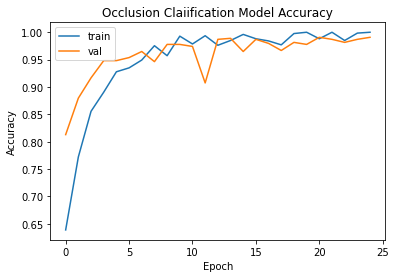

In [ ]:
from matplotlib import pyplot as plt
print(history.history['accuracy'])
print(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Occlusion Claiification Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()